# Etape n°1

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Création du DataFrame pour la population

In [134]:
df_pop = pd.read_csv("csv/df_pop.csv")

Création du DataFrame pour les produits animals

In [135]:
df_anim = pd.read_csv("csv/df_anim.csv")

Création du DataFrame pour les produits végetals

In [136]:
df_veg = pd.read_csv("csv/df_veg.csv")

# Etape n°2

### Question n°1 

In [137]:
def nettoyage_nom_colonne(str):
    """
    Fonction qui ramplace les majuscules par des minuscule et des espaces par des _
    :param str:(str) Nom de la colonne
    :return : (str) Nom de la colonne sans majuscule et espaces
    """
    str=str.lower().strip().replace(" ","_")
    
    return str

### Question n°2 et 3

Dimension dataframe population et 5 premières lignes

In [138]:
#Affiche les informations du dataframe
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       358 non-null    object 
 1   Domain            358 non-null    object 
 2   Area Code (FAO)   358 non-null    int64  
 3   Area              358 non-null    object 
 4   Element Code      358 non-null    int64  
 5   Element           358 non-null    object 
 6   Item Code         358 non-null    int64  
 7   Item              358 non-null    object 
 8   Year Code         358 non-null    int64  
 9   Year              358 non-null    int64  
 10  Unit              358 non-null    object 
 11  Value             358 non-null    float64
 12  Flag              358 non-null    object 
 13  Flag Description  358 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 39.3+ KB


In [139]:
#Affiche la dimension
df_pop.shape

(358, 14)

In [140]:
#Affiche les 5 premières lignes
df_pop.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.0,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042.0,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.0,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881.0,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.0,*,Unofficial figure


Dimension dataframe poduits animals et 5 premières lignes

In [141]:
#Affiche la dimension
df_anim.shape

(30897, 14)

In [142]:
#Affiche les 5 premières lignes
df_anim.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.65,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,Fc,Calculated data


Dimension dataframe poduits végetals et 5 premières lignes

In [143]:
#Affiche les dimensions
df_veg.shape

(91068, 14)

In [144]:
#Affiche les 5premières lignes
df_veg.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data


### Question n°4

Ajout d'une colonne type pour le dataframe des produits animals et vegetals

In [145]:
df_anim["type"] = "animal"

In [146]:
df_veg["type"] = "vegetal"

Regrouper df_anim et df_veg

In [147]:
df_product = pd.concat([df_anim, df_veg])

### Question n°5

In [148]:
df_pop =df_pop.loc[:,['Area Code (FAO)','Area','Year','Value']]
df_pop.rename(columns ={"Value":"pop_1000_hab"},inplace = True)

### Question n°1 (Suite)


In [149]:
for dataframe in [df_pop,df_product]:
    for column_name in dataframe.columns:
        dataframe.rename(columns ={column_name:nettoyage_nom_colonne(column_name)},inplace = True)
    
df_pop

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.0
1,2,Afghanistan,2019,38042.0
2,3,Albania,2018,2883.0
3,3,Albania,2019,2881.0
4,4,Algeria,2018,42228.0
...,...,...,...,...
353,249,Yemen,2019,29162.0
354,251,Zambia,2018,17352.0
355,251,Zambia,2019,17861.0
356,181,Zimbabwe,2018,14439.0


### Question n°6

In [150]:
df_product =df_product.loc[:,["area_code_(fao)", "area", "element", "item", "year", "type", "unit","value"]]

### Question n°7

In [151]:
#fusion des dataframes df_product et df_pop
df = df_pop.merge(df_product,on=["area_code_(fao)","year","area"])
df

,area_code_(fao),area,year,pop_1000_hab,element,item,type,unit,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Bovine Meat,animal,kg,2.62
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Bovine Meat,animal,kcal/capita/day,15.00
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.09
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.20
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,animal,kg,4.26
...,...,...,...,...,...,...,...,...,...
121960,181,Zimbabwe,2019,14645.0,Fat supply quantity (g/capita/day),Infant food,vegetal,g/capita/day,0.00
121961,181,Zimbabwe,2019,14645.0,Food supply quantity (kg/capita/yr),Miscellaneous,vegetal,kg,2.11
121962,181,Zimbabwe,2019,14645.0,Food supply (kcal/capita/day),Miscellaneous,vegetal,kcal/capita/day,2.00
121963,181,Zimbabwe,2019,14645.0,Protein supply quantity (g/capita/day),Miscellaneous,vegetal,g/capita/day,0.07


### Question n°8

In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121965 entries, 0 to 121964
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   area_code_(fao)  121965 non-null  int64  
 1   area             121965 non-null  object 
 2   year             121965 non-null  int64  
 3   pop_1000_hab     121965 non-null  float64
 4   element          121965 non-null  object 
 5   item             121965 non-null  object 
 6   type             121965 non-null  object 
 7   unit             121965 non-null  object 
 8   value            121965 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 9.3+ MB


In [153]:
df.pop_1000_hab.astype(int)
df.year.astype(int)

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
121960    2019
121961    2019
121962    2019
121963    2019
121964    2019
Name: year, Length: 121965, dtype: int64

### Question n°9

In [154]:
import missingno as msno

In [155]:
for column_name in df.columns:
    print(column_name,df[column_name].isna().sum())

area_code_(fao) 0
area 0
year 0
pop_1000_hab 0
element 0
item 0
type 0
unit 0
value 0


<AxesSubplot:>

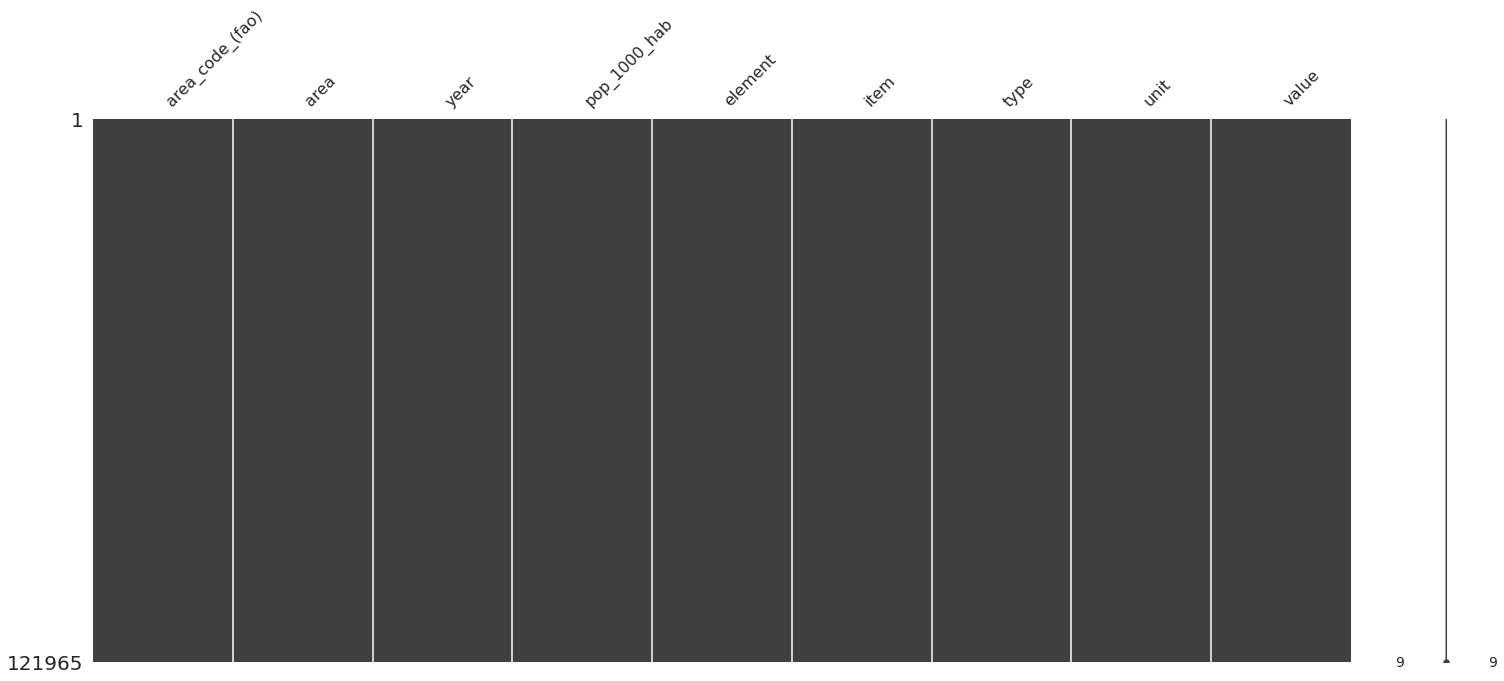

In [156]:
# Visualisation des valeurs manquantes grâce à la libraire missingno
msno.matrix(df)

### Question n°10

In [157]:
df.describe()

,area_code_(fao),year,pop_1000_hab,value
count,121965.000000,121965.000000,1.219650e+05,121965.000000
mean,127.332899,2018.499889,4.369155e+04,10.952411
std,73.062851,0.500002,1.538962e+05,56.049315
min,1.000000,2018.000000,5.200000e+01,-0.030000
25%,66.000000,2018.000000,2.883000e+03,0.000000
50%,123.000000,2018.000000,9.972000e+03,0.150000
75%,191.000000,2019.000000,3.182500e+04,2.900000
max,276.000000,2019.000000,1.433784e+06,1787.000000


### Question n°11

In [158]:
df.area.value_counts()

Nepal              748
Senegal            744
Uganda             740
Sudan              740
Nigeria            734
                  ... 
North Macedonia    628
Kiribati           624
Afghanistan        622
Timor-Leste        604
Turkmenistan       564
Name: area, Length: 179, dtype: int64

### Question n°13

In [159]:
df =df.pivot_table(index=["area_code_(fao)", "area", "year", "pop_1000_hab","item"],columns="element",values="value")

In [160]:
df = df.reset_index()

### Question n°14

In [161]:
df.rename(columns={"area_code_(fao)":"code_country"},inplace=True)
df.rename(columns={"area":"country"},inplace=True)


### Question n°15

In [162]:
mask_2018= df["year"] == 2018
mask_2019= df["year"] == 2019
df[mask_2018]

element,code_country,country,year,pop_1000_hab,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2952.0,Apples and products,0.12,20.0,14.49,0.05
1,1,Armenia,2018,2952.0,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952.0,Aquatic Plants,0.00,0.0,0.00,0.00
3,1,Armenia,2018,2952.0,Bananas,0.06,13.0,7.61,0.15
4,1,Armenia,2018,2952.0,Barley and products,0.03,6.0,0.72,0.20
...,...,...,...,...,...,...,...,...,...
30569,276,Sudan,2018,41802.0,Tomatoes and products,0.09,8.0,14.83,0.38
30570,276,Sudan,2018,41802.0,"Vegetables, other",0.13,17.0,25.88,0.79
30571,276,Sudan,2018,41802.0,Wheat and products,1.68,549.0,63.20,16.43
30572,276,Sudan,2018,41802.0,Wine,0.00,0.0,0.00,0.00


### Question n°16

In [163]:
df_zone = pd.read_csv("csv/zone.csv")
df_zone.sort_values(by="code_country",inplace=True)
for dataframe in [df,df_zone]:
    for column_name in dataframe.columns:
        dataframe.rename(columns ={column_name:nettoyage_nom_colonne(column_name)},inplace = True)

df_merge = df_zone.merge(df,on='code_country')

df_merge[mask_2018]

,code_country,zone,country,year,pop_1000_hab,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,western_asia,Armenia,2018,2952.0,Apples and products,0.12,20.0,14.49,0.05
1,1,western_asia,Armenia,2018,2952.0,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
2,1,western_asia,Armenia,2018,2952.0,Aquatic Plants,0.00,0.0,0.00,0.00
3,1,western_asia,Armenia,2018,2952.0,Bananas,0.06,13.0,7.61,0.15
4,1,western_asia,Armenia,2018,2952.0,Barley and products,0.03,6.0,0.72,0.20
...,...,...,...,...,...,...,...,...,...,...
30569,276,northern_africa,Sudan,2018,41802.0,Tomatoes and products,0.09,8.0,14.83,0.38
30570,276,northern_africa,Sudan,2018,41802.0,"Vegetables, other",0.13,17.0,25.88,0.79
30571,276,northern_africa,Sudan,2018,41802.0,Wheat and products,1.68,549.0,63.20,16.43
30572,276,northern_africa,Sudan,2018,41802.0,Wine,0.00,0.0,0.00,0.00


# Etape n°3

### Question n°1

In [164]:
df_merge[mask_2019]["fat_supply_quantity_(g/capita/day)"].describe()


count    15219.000000
mean         1.060286
std          3.449439
min          0.000000
25%          0.000000
50%          0.030000
75%          0.350000
max         61.780000
Name: fat_supply_quantity_(g/capita/day), dtype: float64

### Question n°2


In [165]:
col_num=df_merge.describe().columns




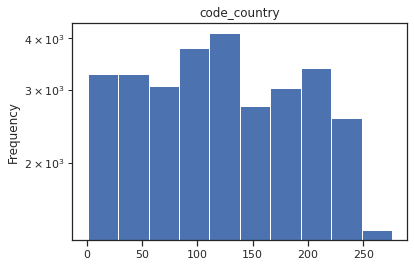

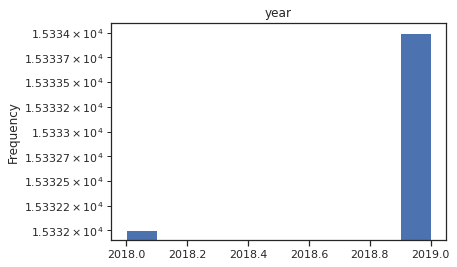

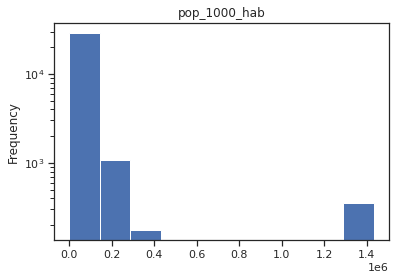

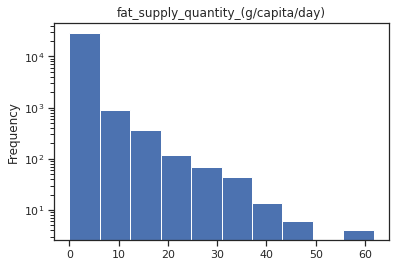

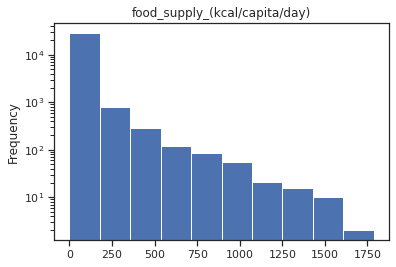

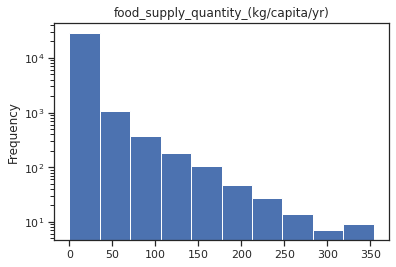

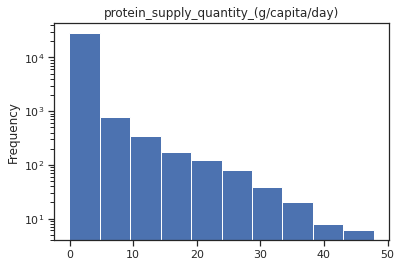

In [166]:
for column in col_num :
    df_merge[column].plot(kind="hist")
    plt.yscale('log')
    plt.title(column)
    plt.show()


### Question n°3

In [167]:
mask_uk = df_merge[mask_2018]["country"] == "Ukraine"
df_uk_2018 = df_merge[mask_2018 & mask_uk]
df_uk_2018["pop_1000_hab"].iloc[1].astype(int)
print(type(df_uk_2018["pop_1000_hab"].iloc[-1].astype(int).item()))
print(df_uk_2018["pop_1000_hab"].iloc[-1].astype(int).item())



<class 'int'>
44246


### Question n°4

In [168]:
df_2019 = df_merge[mask_2019]
df_pop_2019= df_2019[["country","pop_1000_hab"]].groupby(["country","pop_1000_hab"]).count().reset_index()
df_test = df_pop_2019.sort_values(by="pop_1000_hab",ascending=False).head(11)
df_test


,country,pop_1000_hab
34,"China, mainland",1433784.0
75,India,1366418.0
170,United States of America,329065.0
76,Indonesia,270626.0
123,Pakistan,216565.0
20,Brazil,211050.0
119,Nigeria,200964.0
11,Bangladesh,163046.0
134,Russian Federation,145872.0
106,Mexico,127576.0


### Question n°5

In [169]:
# df_2018 = df_merge[mask_2018]
# # df_pop_2018= df_2018[["pop_1000_hab"]].groupby("pop_1000_hab").sum().reset_index()
# # 
# df_2018[["country","pop_1000_hab"]].groupby("country").count().reset_index()
# print(df_pop_2018["pop_1000_hab"].sum()*1000)
df_2018 =df_pop[df_pop["year"]== 2018]

df_2018 = df_2018.rename(columns ={"area":"country"})
df_2018 =df_2018[["country","pop_1000_hab","year"]]
print(df_2018["pop_1000_hab"].sum())
df_2018

7572929.33


,country,pop_1000_hab,year
0,Afghanistan,37172.0,2018
2,Albania,2883.0,2018
4,Algeria,42228.0,2018
6,Angola,30810.0,2018
8,Antigua and Barbuda,96.0,2018
...,...,...,...
348,Venezuela (Bolivarian Republic of),28887.0,2018
350,Viet Nam,95546.0,2018
352,Yemen,28499.0,2018
354,Zambia,17352.0,2018


In [170]:
df_pop_total_2018 = pd.read_csv("csv/df_pop2018.csv")
df_pop_total_2018.columns = df_pop_total_2018.columns.str.strip().str.lower().str.replace(' ', '_')
df_pop_total_2018.rename(columns ={"value":"pop_1000_hab"},inplace=True)
df_pop_total_2018.rename(columns ={"area":"country"},inplace=True)
df_pop_total_2018=df_pop_total_2018[["country","pop_1000_hab","year"]]
print(df_pop_total_2018["pop_1000_hab"].sum()*1000)
df_pop_total_2018

7631368523.0


,country,pop_1000_hab,year
0,Afghanistan,37171.921,2018
1,Albania,2882.740,2018
2,Algeria,42228.408,2018
3,American Samoa,55.465,2018
4,Andorra,77.006,2018
...,...,...,...
231,Wallis and Futuna Islands,11.661,2018
232,Western Sahara,567.402,2018
233,Yemen,28498.683,2018
234,Zambia,17351.708,2018


In [171]:
set_pop = set(df_pop_total_2018["country"])
set_pop2 =set(df_2018["country"])
inter = set_pop.intersection(set_pop2)
union = set_pop.union(set_pop2)
list_dif =list(union - inter)
mask_dif = df_pop_total_2018["country"].isin(list_dif)
df_pop_total_2018[mask_dif]

,country,pop_1000_hab,year
3,American Samoa,55.465,2018
4,Andorra,77.006,2018
6,Anguilla,14.731,2018
10,Aruba,105.845,2018
15,Bahrain,1569.446,2018
22,Bermuda,62.756,2018
23,Bhutan,754.388,2018
25,"Bonaire, Sint Eustatius and Saba",25.711,2018
29,British Virgin Islands,29.802,2018
30,Brunei Darussalam,428.963,2018


In [172]:
df_pop_2018_pays =pd.concat([df_2018,df_pop_total_2018])
df_pop_2018_pays = df_pop_2018_pays["country"].drop_duplicates(keep=False)
df_pop_2018_pays.reset_index(drop=True)
for index in range(57):
    print(df_pop_2018_pays.iloc[index])

American Samoa
Andorra
Anguilla
Aruba
Bahrain
Bermuda
Bhutan
Bonaire, Sint Eustatius and Saba
British Virgin Islands
Brunei Darussalam
Cayman Islands
Channel Islands
Cook Islands
Curaçao
Equatorial Guinea
Eritrea
Falkland Islands (Malvinas)
Faroe Islands
French Guyana
Gibraltar
Greenland
Guadeloupe
Guam
Holy See
Isle of Man
Liechtenstein
Marshall Islands
Martinique
Mayotte
Micronesia (Federated States of)
Monaco
Montserrat
Nauru
Netherlands Antilles (former)
Niue
Northern Mariana Islands
Palau
Palestine
Puerto Rico
Qatar
Réunion
Saint Barthélemy
Saint Helena, Ascension and Tristan da Cunha
Saint Pierre and Miquelon
Saint-Martin (French part)
San Marino
Singapore
Sint Maarten (Dutch part)
Somalia
South Sudan
Tokelau
Tonga
Turks and Caicos Islands
Tuvalu
United States Virgin Islands
Wallis and Futuna Islands
Western Sahara


### Question n°6

In [173]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30666 entries, 0 to 30665
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   code_country                            30666 non-null  int64  
 1   zone                                    30666 non-null  object 
 2   country                                 30666 non-null  object 
 3   year                                    30666 non-null  int64  
 4   pop_1000_hab                            30666 non-null  float64
 5   item                                    30666 non-null  object 
 6   fat_supply_quantity_(g/capita/day)      30447 non-null  float64
 7   food_supply_(kcal/capita/day)           30407 non-null  float64
 8   food_supply_quantity_(kg/capita/yr)     30666 non-null  float64
 9   protein_supply_quantity_(g/capita/day)  30445 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.6+ MB


In [174]:
# df_missing = df_merge[["country","fat_supply_quantity_(g/capita/day)","food_supply_(kcal/capita/day)","protein_supply_quantity_(g/capita/day)"]]
# mask_1 = df_missing["fat_supply_quantity_(g/capita/day)"].isna()
# mask_2 = df_missing["food_supply_(kcal/capita/day)"].isna()
# mask_3 = df_missing["protein_supply_quantity_(g/capita/day)"].isna()
# df_missing = df_missing[mask_1& mask_2& mask_3]
# df_missing = df_missing.groupby("country").sum().reset_index()
# df_missing

In [175]:
liste_columns =["country","fat_supply_quantity_(g/capita/day)","food_supply_(kcal/capita/day)","protein_supply_quantity_(g/capita/day)"]
df_missing=df_merge.drop("country",axis=1).isna().groupby(df.country, sort=True).sum().reset_index()

# mask_1 = df_missing["fat_supply_quantity_(g/capita/day)"] > 0
# mask_2 = df_missing["food_supply_(kcal/capita/day)"] > 0
# mask_3 = df_missing["protein_supply_quantity_(g/capita/day)"] > 0 
# df_missing = df_missing[mask_1& mask_2& mask_3]
df_missing = df_missing.reset_index(drop=True)
df_missing["sum"] =df_missing["fat_supply_quantity_(g/capita/day)"] + df_missing["food_supply_(kcal/capita/day)"] + df_missing["protein_supply_quantity_(g/capita/day)"]
df_missing[["country","sum"]].sort_values('sum',ascending=False).head(10)


,country,sum
29,Chad,34
44,Democratic People's Republic of Korea,32
42,Czechia,24
1,Albania,24
30,Chile,24
71,Haiti,24
48,Dominica,21
21,Bulgaria,21
62,Georgia,18
13,Belarus,18


### Question n°7


In [176]:
df_taux = df_merge[["country","year","pop_1000_hab"]]
df_taux = df_taux.groupby(["country","year","pop_1000_hab"]).count().reset_index()


df_taux = df_taux.set_index("country")
df_taux["taux_croissance_pop_18_19"]= ((df_taux[df_taux["year"] == 2019]["pop_1000_hab"] - df_taux[df_taux["year"] == 2018]["pop_1000_hab"]) / df_taux[df_taux["year"] == 2018]["pop_1000_hab"]) 

df_taux = df_taux.reset_index()


In [177]:
df_merge= df_merge.merge(df_taux, on=["country","year","pop_1000_hab"])


In [178]:
df_merge[["country","taux_croissance_pop_18_19"]].drop_duplicates().head(40)

,country,taux_croissance_pop_18_19
0,Armenia,0.002033
166,Afghanistan,0.023405
325,Albania,-0.000694
491,Algeria,0.019537
662,Angola,0.032944
839,Antigua and Barbuda,0.010417
1014,Argentina,0.009468
1177,Australia,0.012250
1351,Austria,0.007198
1525,Bahamas,0.007772


### Question n°8

In [179]:
df_zone =df_merge[["zone","country","taux_croissance_pop_18_19"]].drop_duplicates()
df_zone = df_zone.groupby(["zone"]).mean().sort_values(by="taux_croissance_pop_18_19")
df_zone

,taux_croissance_pop_18_19
zone,
eastern_europe,-0.002195
southern_europe,-0.001878
northern_europe,0.002073
western_europe,0.002806
polynesia,0.004350
eastern_asia,0.005987
caribbean,0.007056
northern_america,0.007541
south_america,0.008955


### Question n°9

In [180]:
df_total_food =df_merge[["country","year","pop_1000_hab","fat_supply_quantity_(g/capita/day)","food_supply_(kcal/capita/day)","food_supply_quantity_(kg/capita/yr)","protein_supply_quantity_(g/capita/day)"]]

df_total_food =df_merge.groupby(["country","year","pop_1000_hab"])[["fat_supply_quantity_(g/capita/day)","food_supply_(kcal/capita/day)","food_supply_quantity_(kg/capita/yr)","protein_supply_quantity_(g/capita/day)"]].sum().reset_index()
df_total_food["total_fat_supply_quantity_(kg/yr)"]= df_total_food["pop_1000_hab"] * 1000 * df_total_food["fat_supply_quantity_(g/capita/day)"] / 1000 *365
df_total_food["total_food_supply_(kcal/yr)"]= df_total_food["pop_1000_hab"] * 1000 * df_total_food["food_supply_(kcal/capita/day)"] * 365
df_total_food["total_food_supply_quantity_(kg/yr)"]= df_total_food["pop_1000_hab"] * 1000 * df_total_food["food_supply_quantity_(kg/capita/yr)"]
df_total_food["total_protein_supply_quantity_(kg/yr)"]= df_total_food["pop_1000_hab"] * 1000 * df_total_food["protein_supply_quantity_(g/capita/day)"] / 1000 *365


In [181]:
df_total_food.head(10)

,country,year,pop_1000_hab,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),total_fat_supply_quantity_(kg/yr),total_food_supply_(kcal/yr),total_food_supply_quantity_(kg/yr),total_protein_supply_quantity_(kg/yr)
0,Afghanistan,2018,37172.0,41.45,2267.0,365.31,57.61,5.623845e+08,3.075816e+13,1.357930e+10,7.816398e+08
1,Afghanistan,2019,38042.0,39.75,2271.0,388.23,57.29,5.519419e+08,3.153358e+13,1.476905e+10,7.954906e+08
2,Albania,2018,2883.0,116.30,3295.0,1164.42,112.81,1.223819e+08,3.467312e+12,3.357023e+09,1.187094e+08
3,Albania,2019,2881.0,115.88,3334.0,1200.82,115.98,1.218554e+08,3.505918e+12,3.459562e+09,1.219605e+08
4,Algeria,2018,42228.0,87.25,3379.0,750.81,90.30,1.344803e+09,5.208127e+13,3.170520e+10,1.391814e+09
5,Algeria,2019,43053.0,98.10,3490.0,776.32,90.82,1.541577e+09,5.484306e+13,3.342290e+10,1.427177e+09
6,Angola,2018,30810.0,58.11,2445.0,631.87,53.83,6.534847e+08,2.749561e+13,1.946791e+10,6.053533e+08
7,Angola,2019,31825.0,59.43,2441.0,624.40,52.07,6.903463e+08,2.835496e+13,1.987153e+10,6.048516e+08
8,Antigua and Barbuda,2018,96.0,92.67,2468.0,617.68,80.68,3.247157e+06,8.647872e+10,5.929728e+07,2.827027e+06
9,Antigua and Barbuda,2019,97.0,91.35,2483.0,623.17,80.59,3.234247e+06,8.791062e+10,6.044749e+07,2.853289e+06


### Question n°10


In [182]:

# food_supply_(kcal/capita/day) food_supply_quantity_(kg/capita/yr)
df_ratio= df_merge
df_ratio[df_ratio["food_supply_(kcal/capita/day)"].notna() & df_ratio["food_supply_quantity_(kg/capita/yr)"].notna()]
df_ratio =df_ratio[df_ratio["food_supply_quantity_(kg/capita/yr)"] > 0].reset_index()
df_ratio["ratio"]=df_ratio["food_supply_(kcal/capita/day)"] / (df_ratio["food_supply_quantity_(kg/capita/yr)"]/365)

df_ratio_eggs =df_ratio[df_ratio["item"]== "Eggs"].reset_index()
df_ratio_eggs["ratio_eggs"]= 155/(100/1000)
print("ratio_eggs",155/(100/1000))
print(df_ratio_eggs[df_ratio_eggs["year"]== 2018]["ratio"].mean())
print(df_ratio_eggs[df_ratio_eggs["year"]== 2019]["ratio"].mean())

ratio_eggs 1550.0
1353.1831543360445
1336.1899258709366


In [183]:
df_ratio_items = df_ratio[df_ratio["ratio"].notna()]

df_ratio_items = df_ratio_items[["item","ratio"]]
df_ratio_items = df_ratio_items.groupby(["item"])["ratio"].mean().reset_index()
df_ratio_items = df_ratio_items.sort_values("ratio",ascending=False)
print(df_ratio_items.head(11)) # Question 12 
df_ratio_items= df_ratio_items[df_ratio_items["item"] != "Cocoa Beans and products"]

                        item          ratio
16  Cocoa Beans and products  241095.641494
26        Fats, Animals, Raw   23355.431657
68      Rape and Mustard Oil   19340.388650
50       Oilcrops Oil, Other   16657.757634
20            Cottonseed Oil   10978.709921
77              Soyabean Oil    9469.831225
71              Ricebran Oil    9181.623436
56                  Palm Oil    8955.479620
17               Coconut Oil    8906.745583
85         Sunflowerseed Oil    8623.079377
57            Palmkernel Oil    8383.646128


### Question n°11

In [184]:
df_protein = df_merge
df_protein[df_protein["protein_supply_quantity_(g/capita/day)"].notna() & df_protein["food_supply_quantity_(kg/capita/yr)"].notna()]
df_protein =df_protein[df_protein["food_supply_quantity_(kg/capita/yr)"] > 0].reset_index()
df_protein["pourcentage_prot"]=((df_protein["protein_supply_quantity_(g/capita/day)"] )/ (df_ratio["food_supply_quantity_(kg/capita/yr)"]*1000/365))*100
df_protein_eggs =df_protein[df_protein["item"]== "Eggs"].reset_index()

df_protein_eggs["pourcentage_prot_eggs"]= 13
print("pourcentage_prot_eggs",13)
print(df_protein_eggs[df_protein_eggs["year"]== 2018]["pourcentage_prot"].mean())
print(df_protein_eggs[df_protein_eggs["year"]== 2019]["pourcentage_prot"].mean())
print(df_protein_eggs["pourcentage_prot"].mean())

pourcentage_prot_eggs 13
10.742025685717865
10.773299571110273
10.757662628414064


In [185]:
df_protein_items = df_protein[df_protein["pourcentage_prot"].notna()]

df_protein_items = df_protein_items[["item","pourcentage_prot"]]
df_protein_items = df_protein_items.groupby(["item"])["pourcentage_prot"].mean().reset_index()
df_protein_items = df_protein_items.sort_values("pourcentage_prot",ascending=False)
print(df_protein_items.head(11)) # Question 13
df_protein_items =df_protein_items[df_protein_items["item"] != "Cocoa Beans and products"]

                          item  pourcentage_prot
16    Cocoa Beans and products        302.305401
58                        Peas         22.892580
5                        Beans         21.890413
41                 Meat, Other         21.854102
67  Pulses, Other and products         21.797735
34                  Groundnuts         20.176619
78                   Soyabeans         18.064632
49              Offals, Edible         17.606125
51             Oilcrops, Other         17.476295
74                 Sesame seed         17.343018
69        Rape and Mustardseed         15.642857


### Question n°14

In [111]:
df_food_supply = df_merge[["zone","food_supply_(kcal/capita/day)"]]

df_food_supply

,zone,food_supply_(kcal/capita/day)
0,western_asia,20.0
1,western_asia,0.0
2,western_asia,0.0
3,western_asia,13.0
4,western_asia,6.0
...,...,...
30661,northern_africa,9.0
30662,northern_africa,20.0
30663,northern_africa,535.0
30664,northern_africa,0.0


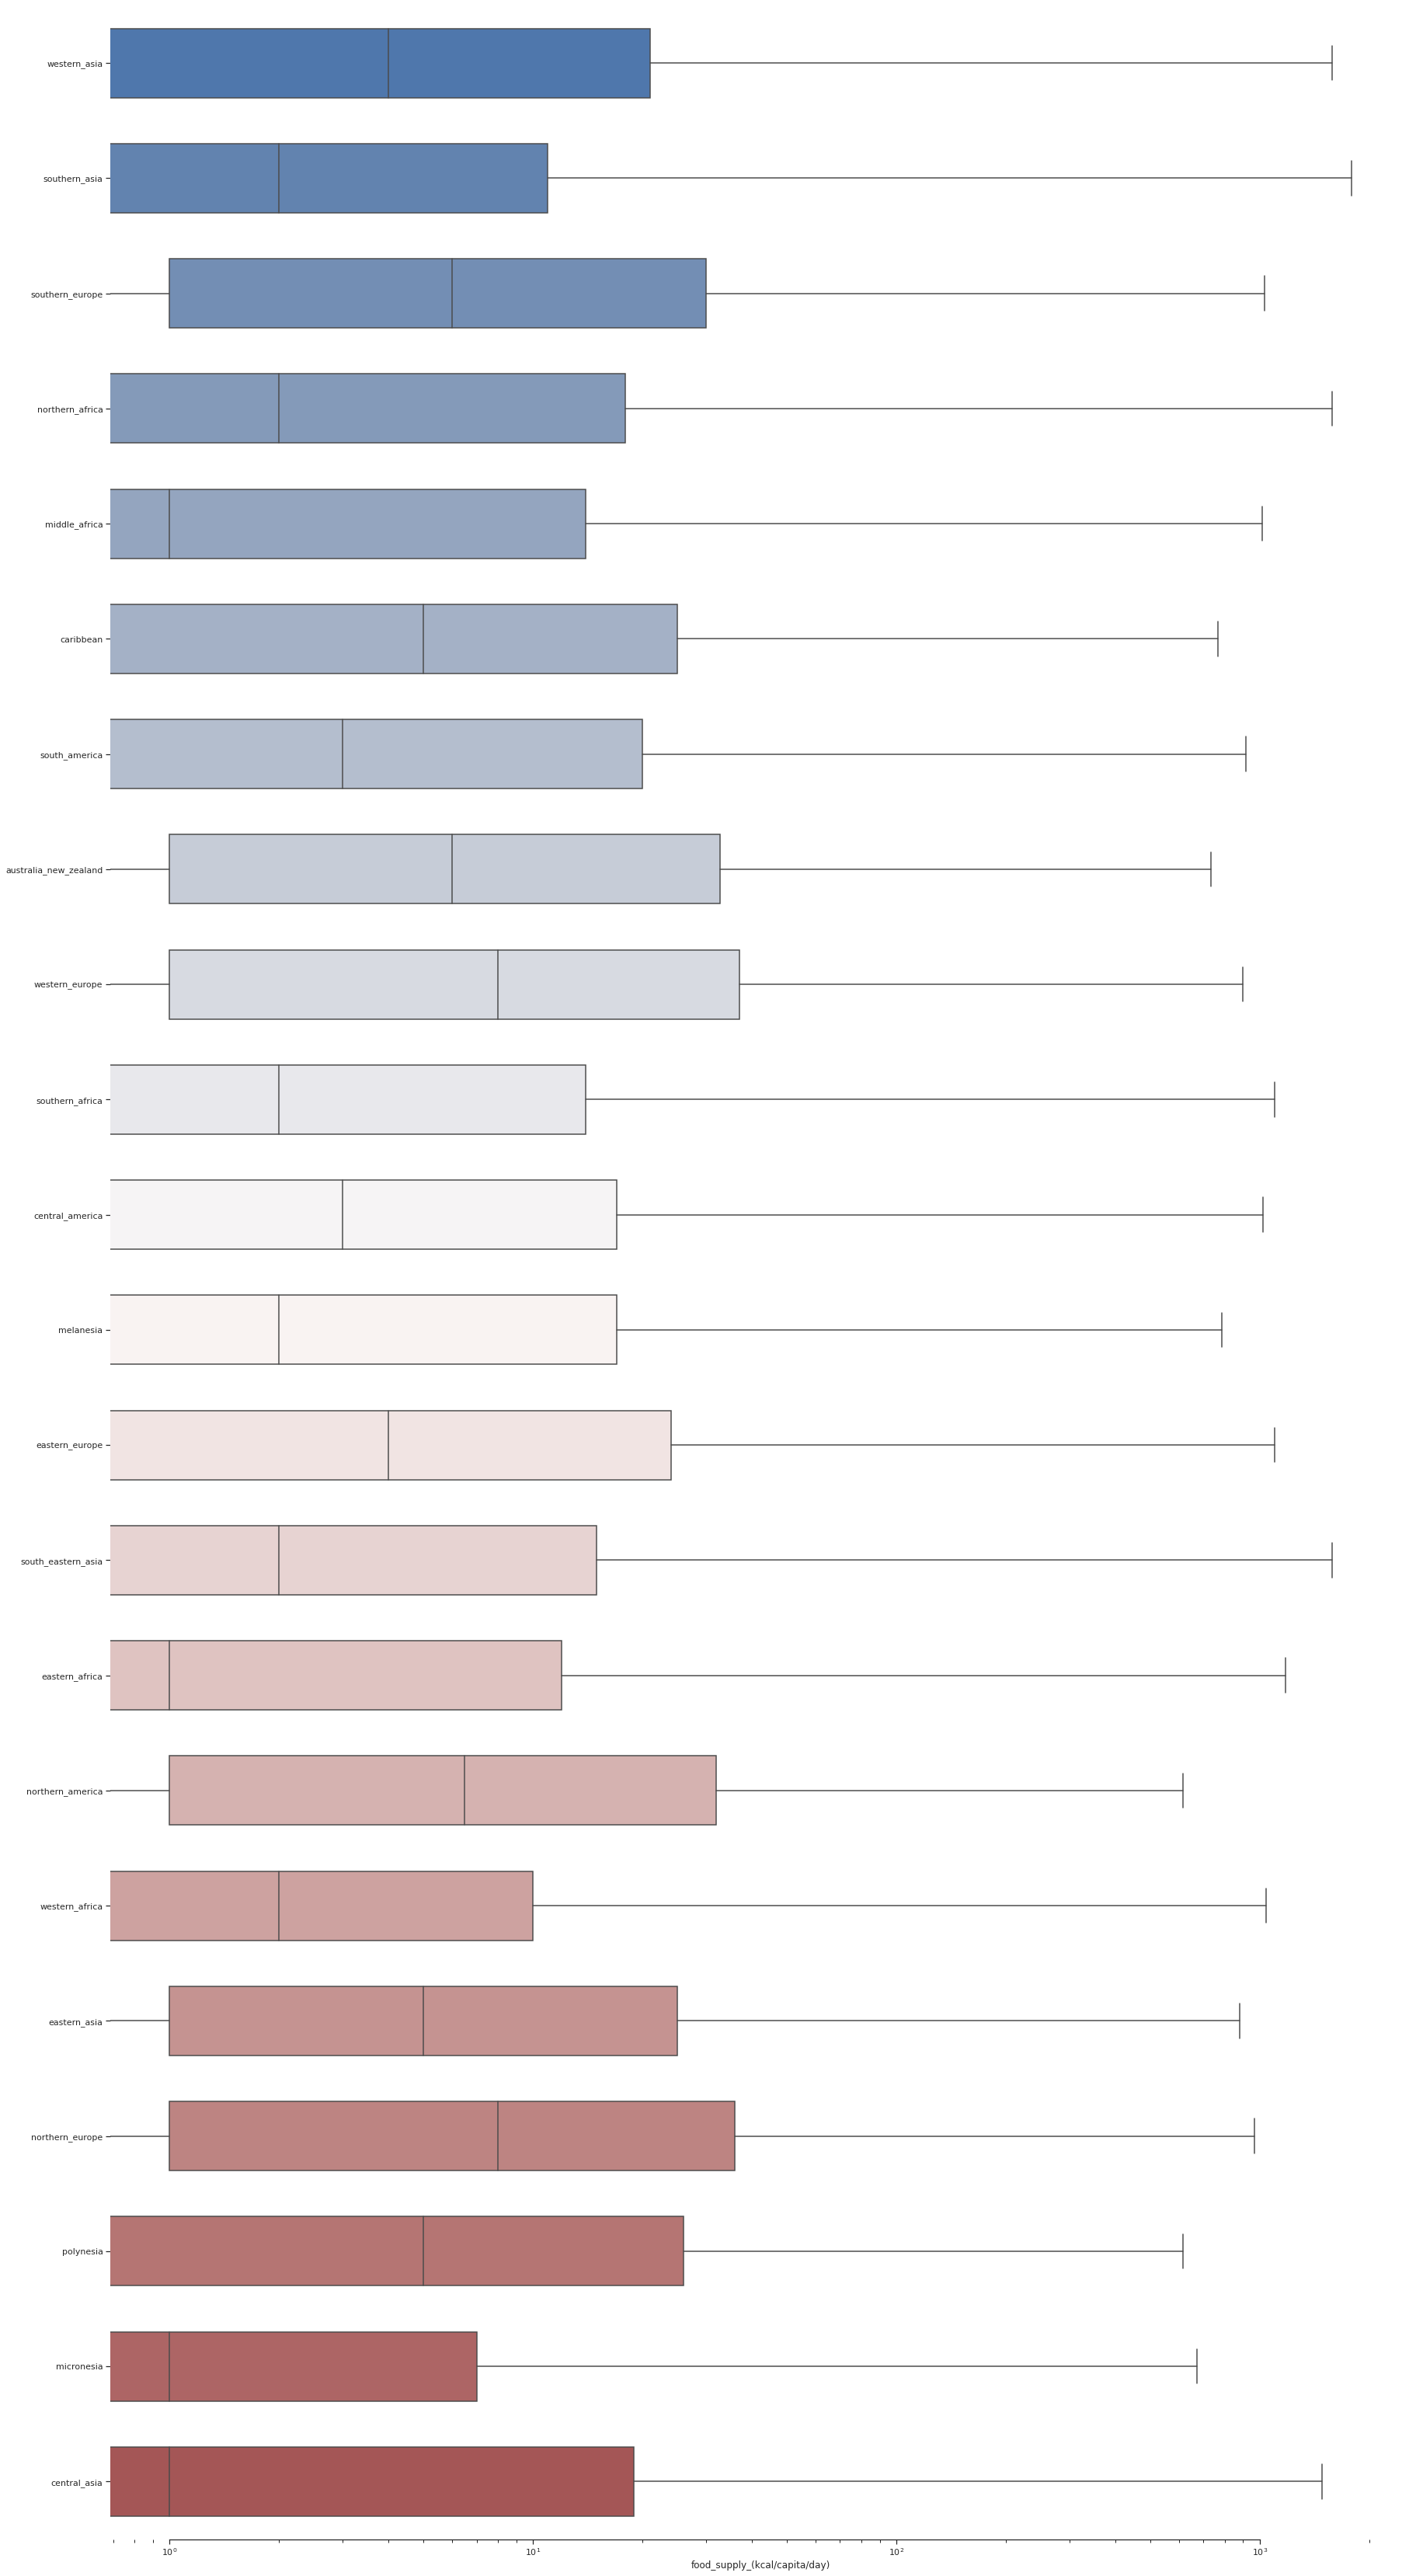

In [186]:

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")

# Load the example planets dataset
# food_supply = sns.load_dataset(df_food_supply)

# Plot the orbital period with horizontal boxes
sns.boxplot(x="food_supply_(kcal/capita/day)", y="zone", data=df_food_supply,
            whis=[0, 100], width=.6, palette="vlag",ax=ax)

# Add in points to show each observation
# sns.stripplot(x="food_supply_(kcal/capita/day)", y="zone", data=df_food_supply,
#               size=4, color=".3", linewidth=0)

# Tweak the visual presentation
f.set_size_inches(30, 60)

ax.set(ylabel="")
sns.despine(trim=True, left=True)